# Predicting Melbourne House Price in [InClass] Kaggle Competition
### References:
#### https://www.kaggle.com/c/home-data-for-ml-course
#### https://www.kaggle.com/learn/intro-to-machine-learning

## Introduction
As different regression algirithms exists, house price will be predicted with few of the basic algorithms such as Decision Tree and Random Forrest. Then optimization will be perfomred and get evaluatated for the performance. Once best model is identified, prediction will be made against that model and predictions will then be uploaded into Kaggle competion for scoring.

In [133]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline
pd.set_option('max_columns', None)

In [134]:
# Loads training and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [135]:
# Shows how the training data looks like
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [136]:
# Gets the statistics of the training data
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [138]:
# Checks for missing data in train and test data
pd.DataFrame({"Train Data": train_data.isna().sum(), "Test Data": test_data.isna().sum()})

,Train Data,Test Data
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
3SsnPorch,0,0.0
Alley,1369,1352.0
BedroomAbvGr,0,0.0
...,...,...
Utilities,0,2.0
WoodDeckSF,0,0.0
YearBuilt,0,0.0
YearRemodAdd,0,0.0


In [139]:
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [140]:
# Fow now, let's not consider the following columns as features
# 'Id', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 
# 'BldgType', 'HouseStyle', 'RoofStyle',
# 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 
# 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'HeatingQC', 
# 'Electrical', 'LowQualFinSF',
#  'BsmtHalfBath',  'KitchenAbvGr', 'Functional',  
# 'FireplaceQu', 'GarageQual', 
# 'GarageCond', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'PoolQC',
# 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 

# Below ones are the features, both categorical and non-categorical, are of our interest.

features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 
            'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'MasVnrType', 'BsmtFinSF1', 'BsmtUnfSF', 'ExterQual', 'BsmtQual', 
            'TotalBsmtSF', 
            'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
            'BsmtFullBath',
            'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
            'Fireplaces',
            'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 
            'ScreenPorch', 
            'PavedDrive', 'SaleCondition']

In [141]:
train_data = train_data[["Id"] + features + ["SalePrice"]]
test_data = test_data[["Id"] + features]

### Preprocessing data
This includes filling missing data and encoding them for both training and test data.

In [142]:
# MSSubClass - a ordinal feature, was encoded
# Dictionary was made manually as few subclasses are there in test data, but not in train data.
"""
mssubclass_dict = {20: 1, 30: 2, 40: 3, 45: 4, 50: 5, 60: 6, 70: 7, 75: 8, 80: 9, 85: 10, 90: 11, 
                   120: 12, 150: 13, 160: 14, 180: 15, 190: 16}
train_data.MSSubClass = train_data.MSSubClass.replace(mssubclass_dict)
test_data.MSSubClass = test_data.MSSubClass.replace(mssubclass_dict)
"""

'\nmssubclass_dict = {20: 1, 30: 2, 40: 3, 45: 4, 50: 5, 60: 6, 70: 7, 75: 8, 80: 9, 85: 10, 90: 11, \n                   120: 12, 150: 13, 160: 14, 180: 15, 190: 16}\ntrain_data.MSSubClass = train_data.MSSubClass.replace(mssubclass_dict)\ntest_data.MSSubClass = test_data.MSSubClass.replace(mssubclass_dict)\n'

In [143]:
# MSZoning - a nominal feature, was filled for missing values and one-hot-encoded.

test_data.MSZoning.fillna(test_data.MSZoning.value_counts().index[0], inplace=True)
train_data = train_data.join(pd.get_dummies(train_data.MSZoning, prefix="MSZoning")).drop(["MSZoning"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.MSZoning, prefix="MSZoning")).drop(["MSZoning"], axis=1)

In [144]:
# LotFrontage - a numeric feature, was filled for missing values with average

train_data.LotFrontage.fillna(train_data.LotFrontage.mean(), inplace=True)
test_data.LotFrontage.fillna(test_data.LotFrontage.mean(), inplace=True)

In [145]:
# LotShape - a ordinal feature, was encoded

lotshape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
train_data.LotShape = train_data.LotShape.replace(lotshape_dict)
test_data.LotShape = test_data.LotShape.replace(lotshape_dict)

In [146]:
# Neighborhood - a nominal feature, was one-hot-encoded.

train_data = train_data.join(pd.get_dummies(train_data.Neighborhood, prefix="Neighborhood")).drop(["Neighborhood"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Neighborhood, prefix="Neighborhood")).drop(["Neighborhood"], axis=1)

In [147]:
# MasVnrType - considering it a nominal features, missing values were filled in and it was one-hot-encoded.

train_data.MasVnrType.fillna(train_data.MasVnrType.value_counts().index[0], inplace=True)
test_data.MasVnrType.fillna(test_data.MasVnrType.value_counts().index[0], inplace=True)

train_data = train_data.join(pd.get_dummies(train_data.MasVnrType, prefix="MasVnrType")).drop(["MasVnrType"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.MasVnrType, prefix="MasVnrType")).drop(["MasVnrType"], axis=1)

In [148]:
# ExterQual - a ordinal feature, was encoded

exterqual_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_data.ExterQual = train_data.ExterQual.replace(exterqual_dict)
test_data.ExterQual = test_data.ExterQual.replace(exterqual_dict)

In [149]:
# BsmtQual - a ordinal features, missing values were filled in and it was encoded.

train_data.BsmtQual.fillna(train_data.BsmtQual.value_counts().index[0], inplace=True)
test_data.BsmtQual.fillna(test_data.BsmtQual.value_counts().index[0], inplace=True)

bsmtqual_dict = {'NA': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
train_data.BsmtQual = train_data.BsmtQual.replace(bsmtqual_dict)
test_data.BsmtQual = test_data.BsmtQual.replace(bsmtqual_dict)

In [152]:
# BsmtFinSF1 - a numeric feature, was filled for missing values in test data with average
test_data.BsmtFinSF1.fillna(test_data.BsmtFinSF1.median(), inplace=True)
test_data.BsmtFinSF1 = test_data.BsmtFinSF1.astype('int')

In [153]:
# BsmtUnfSF - a numeric feature, was filled for missing values in test data with average
test_data.BsmtUnfSF.fillna(test_data.BsmtUnfSF.median(), inplace=True)
test_data.BsmtUnfSF = test_data.BsmtUnfSF.astype('int')

In [154]:
# TotalBsmtSF - a numeric feature, was filled for missing values in test data with average
test_data.TotalBsmtSF.fillna(test_data.TotalBsmtSF.median(), inplace=True)
test_data.TotalBsmtSF = test_data.TotalBsmtSF.astype('int')

In [155]:
# CentralAir - a ordinal feature, was encoded

centralac_dict = {'N': 1, 'Y': 2}
train_data.CentralAir = train_data.CentralAir.replace(centralac_dict)
test_data.CentralAir = test_data.CentralAir.replace(centralac_dict)

In [156]:
# BsmtFullBath - a numeric feature, was filled for missing values in test data with average
test_data.BsmtFullBath.fillna(test_data.BsmtFullBath.median(), inplace=True)
test_data.BsmtFullBath = test_data.BsmtFullBath.astype('int')

In [157]:
# KitchenQual - a ordinal feature, was encoded after filling in a missing value in test data

kitchenqual_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

test_data.KitchenQual.fillna(test_data.KitchenQual.value_counts().index[0], inplace=True)
train_data.KitchenQual = train_data.KitchenQual.replace(kitchenqual_dict)
test_data.KitchenQual = test_data.KitchenQual.replace(kitchenqual_dict)

In [158]:
# GarageType - a nominal feature, was filled in for missing values and then one-hot-encoded

train_data.GarageType.fillna(train_data.GarageType.value_counts().index[0], inplace=True)
test_data.GarageType.fillna(test_data.GarageType.value_counts().index[0], inplace=True)

train_data = train_data.join(pd.get_dummies(train_data.GarageType, prefix="GarageType")).drop(["GarageType"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.GarageType, prefix="GarageType")).drop(["GarageType"], axis=1)

In [159]:
# GarageYrBlt - a numerical feature, was filled in for missing value in test data.
train_data.GarageYrBlt.fillna(train_data.YearBuilt, inplace=True)
train_data.GarageYrBlt = train_data.GarageYrBlt.astype('int')

test_data.GarageYrBlt.fillna(test_data.YearBuilt, inplace=True)
test_data.GarageYrBlt = test_data.GarageYrBlt.astype('int')

In [160]:
# GarageFinish - a ordinal feature, was filled in for missing values and then encoded
train_data.GarageFinish.fillna(train_data.GarageFinish.value_counts().index[0], inplace=True)
test_data.GarageFinish.fillna(test_data.GarageFinish.value_counts().index[0], inplace=True)

garagefinish_dict = {'NA': 1, 'Unf': 2, 'RFn': 3, 'Fin': 4}
train_data.GarageFinish = train_data.GarageFinish.replace(garagefinish_dict)
test_data.GarageFinish = test_data.GarageFinish.replace(garagefinish_dict)

In [161]:
# GarageCars- a numerical feature, was filled in for missing value in test data.
test_data.GarageCars.fillna(test_data.GarageCars.median(), inplace=True)
test_data.GarageCars = test_data.GarageCars.astype('int')

In [162]:
# GarageArea - a numerical feature, was filled in for missing value in test data.
test_data.GarageArea.fillna(test_data.GarageArea.median(), inplace=True)
test_data.GarageArea = test_data.GarageArea.astype('int')

In [163]:
# PavedDrive - a ordinal feature, was encoded
paveddrive_dict = {'N': 1, 'P': 2, 'Y': 3}
train_data.PavedDrive = train_data.PavedDrive.replace(paveddrive_dict)
test_data.PavedDrive = test_data.PavedDrive.replace(paveddrive_dict)

In [164]:
# SaleCondition - a nominal feature, was one-hot-encoded

train_data = train_data.join(pd.get_dummies(train_data.SaleCondition, prefix="SaleCondition")).drop(["SaleCondition"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.SaleCondition, prefix="SaleCondition")).drop(["SaleCondition"], axis=1)

In [165]:
train_data.columns.get_loc("SalePrice")

33

In [166]:
train_data.copy().drop(["Id", "SalePrice"], axis=1)

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageYrBlt,WoodDeckSF,OpenPorchSF,ScreenPorch,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,4,7,5,2003,2003,706,150,4,5,856,2,856,854,1710,1,2,1,3,4,8,0,3,2,548,2003,0,61,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,20,80.0,9600,4,6,8,1976,1976,978,284,3,5,1262,2,1262,0,1262,0,2,0,3,3,6,1,3,2,460,1976,298,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,68.0,11250,3,7,5,2001,2002,486,434,4,5,920,2,920,866,1786,1,2,1,3,4,6,1,3,2,608,2001,0,42,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,70,60.0,9550,3,7,5,1915,1970,216,540,3,4,756,2,961,756,1717,1,1,0,3,4,7,1,2,3,642,1998,0,35,0,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,3,8,5,2000,2000,655,490,4,5,1145,2,1145,1053,2198,1,2,1,4,4,9,1,3,3,836,2000,192,84,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,4,6,5,1999,2000,0,953,3,5,953,2,953,694,1647,0,2,1,3,3,7,1,3,2,460,1999,0,40,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1456,20,85.0,13175,4,6,6,1978,1988,790,589,3,5,1542,2,2073,0,2073,1,2,0,3,3,7,2,2,2,500,1978,349,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1457,70,66.0,9042,4,7,9,1941,2006,275,877,5,4,1152,2,1188,1152,2340,0,2,0,4,4,9,2,3,1,252,1941,0,60,0,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1458,20,68.0,9717,4,5,6,1950,1996,49,0,3,4,1078,2,1078,0,1078,1,1,0,2,4,5,0,2,1,240,1950,366,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


### Decision Tree - Let's first get started with it

In [167]:
# Creates training label
y = train_data.SalePrice

# Creates a dataset with feates we are interested in
X = train_data.copy().drop(["Id", "SalePrice"], axis=1)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [168]:
print("train_X shape: ", train_X.shape, ", val_X shape: ", val_X.shape,
      "train_y shape: ", train_y.shape, ", val_y shape: ", val_y.shape)

train_X shape:  (1095, 78) , val_X shape:  (365, 78) train_y shape:  (1095,) , val_y shape:  (365,)


#### Let's first get predictions on default Decision Tree model.

In [169]:
# Creates model without max. leaf nodes parameter
dt_model = DecisionTreeRegressor(random_state=1)

# Fits model
dt_model.fit(train_X, train_y)

# Performes predictions on validation data and calculates mean absolute error
dt_val_predictions = dt_model.predict(val_X)
dt_val_mae = mean_absolute_error(dt_val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(dt_val_mae))

Validation MAE when not specifying max_leaf_nodes: 24,496


#### Now, create Decision Tree model by passing variying number of max. leaf nodes as parameter and observe prediction performance.

In [170]:
# Creates a list to store the Mean Absolute Error against validation data
dt_val_maes = []

In [171]:
# Now, loops through max. leaf nodes count and store Mean Absolute Error (MAE)

for i in range(2, 500):
    dt_model = DecisionTreeRegressor(max_leaf_nodes=i, random_state=1)
    dt_model.fit(train_X, train_y)
    dt_val_predictions = dt_model.predict(val_X)
    dt_val_mae = mean_absolute_error(dt_val_predictions, val_y)
    print("Max. Leaf Nodes: ", i, "Validation MAE: {:,.0f}".format(dt_val_mae))
    dt_val_maes.append(dt_val_mae)

Max. Leaf Nodes:  2 Validation MAE: 42,962
Max. Leaf Nodes:  3 Validation MAE: 36,153
Max. Leaf Nodes:  4 Validation MAE: 33,781
Max. Leaf Nodes:  5 Validation MAE: 31,249
Max. Leaf Nodes:  6 Validation MAE: 32,330
Max. Leaf Nodes:  7 Validation MAE: 30,945
Max. Leaf Nodes:  8 Validation MAE: 29,543
Max. Leaf Nodes:  9 Validation MAE: 28,062
Max. Leaf Nodes:  10 Validation MAE: 28,279
Max. Leaf Nodes:  11 Validation MAE: 29,061
Max. Leaf Nodes:  12 Validation MAE: 28,987
Max. Leaf Nodes:  13 Validation MAE: 28,628
Max. Leaf Nodes:  14 Validation MAE: 28,688
Max. Leaf Nodes:  15 Validation MAE: 28,086
Max. Leaf Nodes:  16 Validation MAE: 27,399
Max. Leaf Nodes:  17 Validation MAE: 27,258
Max. Leaf Nodes:  18 Validation MAE: 26,323
Max. Leaf Nodes:  19 Validation MAE: 25,402
Max. Leaf Nodes:  20 Validation MAE: 24,683
Max. Leaf Nodes:  21 Validation MAE: 24,659
Max. Leaf Nodes:  22 Validation MAE: 25,215
Max. Leaf Nodes:  23 Validation MAE: 25,112
Max. Leaf Nodes:  24 Validation MAE: 25,

Max. Leaf Nodes:  188 Validation MAE: 25,050
Max. Leaf Nodes:  189 Validation MAE: 25,044
Max. Leaf Nodes:  190 Validation MAE: 24,887
Max. Leaf Nodes:  191 Validation MAE: 24,908
Max. Leaf Nodes:  192 Validation MAE: 24,925
Max. Leaf Nodes:  193 Validation MAE: 24,958
Max. Leaf Nodes:  194 Validation MAE: 24,958
Max. Leaf Nodes:  195 Validation MAE: 25,042
Max. Leaf Nodes:  196 Validation MAE: 25,016
Max. Leaf Nodes:  197 Validation MAE: 25,016
Max. Leaf Nodes:  198 Validation MAE: 25,033
Max. Leaf Nodes:  199 Validation MAE: 25,042
Max. Leaf Nodes:  200 Validation MAE: 24,995
Max. Leaf Nodes:  201 Validation MAE: 24,995
Max. Leaf Nodes:  202 Validation MAE: 24,995
Max. Leaf Nodes:  203 Validation MAE: 25,010
Max. Leaf Nodes:  204 Validation MAE: 25,087
Max. Leaf Nodes:  205 Validation MAE: 25,125
Max. Leaf Nodes:  206 Validation MAE: 25,125
Max. Leaf Nodes:  207 Validation MAE: 25,186
Max. Leaf Nodes:  208 Validation MAE: 25,186
Max. Leaf Nodes:  209 Validation MAE: 25,226
Max. Leaf 

Max. Leaf Nodes:  377 Validation MAE: 25,256
Max. Leaf Nodes:  378 Validation MAE: 25,243
Max. Leaf Nodes:  379 Validation MAE: 25,236
Max. Leaf Nodes:  380 Validation MAE: 25,236
Max. Leaf Nodes:  381 Validation MAE: 25,268
Max. Leaf Nodes:  382 Validation MAE: 25,279
Max. Leaf Nodes:  383 Validation MAE: 25,286
Max. Leaf Nodes:  384 Validation MAE: 25,286
Max. Leaf Nodes:  385 Validation MAE: 25,286
Max. Leaf Nodes:  386 Validation MAE: 25,296
Max. Leaf Nodes:  387 Validation MAE: 25,227
Max. Leaf Nodes:  388 Validation MAE: 25,212
Max. Leaf Nodes:  389 Validation MAE: 25,224
Max. Leaf Nodes:  390 Validation MAE: 25,199
Max. Leaf Nodes:  391 Validation MAE: 25,227
Max. Leaf Nodes:  392 Validation MAE: 25,238
Max. Leaf Nodes:  393 Validation MAE: 25,234
Max. Leaf Nodes:  394 Validation MAE: 25,234
Max. Leaf Nodes:  395 Validation MAE: 25,236
Max. Leaf Nodes:  396 Validation MAE: 25,253
Max. Leaf Nodes:  397 Validation MAE: 25,257
Max. Leaf Nodes:  398 Validation MAE: 25,232
Max. Leaf 

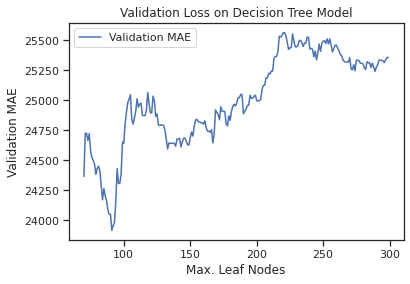

In [172]:
# Now, plots validation errors to visualize

plt.plot(range(70, 300), dt_val_maes[68:298], "b", label="Validation MAE")
plt.title("Validation Loss on Decision Tree Model")
plt.xlabel("Max. Leaf Nodes")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

In [173]:
# It seems from the above plot that MAE is lowest at some point when value of max. leaf nodes is somewhere between
# 60 and 100. Let's find that.

dt_val_mae_min = min(dt_val_maes)

print("So, the lowest validation MAE for validation data ", dt_val_mae_min,
     "and the value for max. leaf nodes for which it is the lowest is ", dt_val_maes.index(dt_val_mae_min))

So, the lowest validation MAE for validation data  23914.870476906963 and the value for max. leaf nodes for which it is the lowest is  89


### Random Forest - Now, build model on it and compare its performance with that of Decision Tree

In [174]:
# Creates model without max. leaf nodes parameter
rf_model = RandomForestRegressor(random_state=1)

# Fits model
rf_model.fit(train_X, train_y)

# Performes predictions on validation data and calculates mean absolute error
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(rf_val_mae))

Validation MAE when not specifying max_leaf_nodes: 16,104


In [175]:
# Creates a list to store the Mean Absolute Error against validation data
rf_val_maes = []

In [181]:
# Now, loops through max. leaf nodes count and store Mean Absolute Error (MAE)

for i in range(2, 500):
    rf_model = RandomForestRegressor(max_leaf_nodes=i, random_state=1)
    rf_model.fit(train_X, train_y)
    rf_val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
    print("Max. Leaf Nodes: ", i, "Validation MAE: {:,.0f}".format(rf_val_mae))
    rf_val_maes.append(rf_val_mae)

Max. Leaf Nodes:  2 Validation MAE: 39,257
Max. Leaf Nodes:  3 Validation MAE: 32,580
Max. Leaf Nodes:  4 Validation MAE: 30,107
Max. Leaf Nodes:  5 Validation MAE: 28,299
Max. Leaf Nodes:  6 Validation MAE: 27,237
Max. Leaf Nodes:  7 Validation MAE: 26,154
Max. Leaf Nodes:  8 Validation MAE: 25,184
Max. Leaf Nodes:  9 Validation MAE: 24,399
Max. Leaf Nodes:  10 Validation MAE: 23,540
Max. Leaf Nodes:  11 Validation MAE: 22,930
Max. Leaf Nodes:  12 Validation MAE: 22,506
Max. Leaf Nodes:  13 Validation MAE: 22,137
Max. Leaf Nodes:  14 Validation MAE: 21,676
Max. Leaf Nodes:  15 Validation MAE: 21,375
Max. Leaf Nodes:  16 Validation MAE: 21,097
Max. Leaf Nodes:  17 Validation MAE: 20,840
Max. Leaf Nodes:  18 Validation MAE: 20,571
Max. Leaf Nodes:  19 Validation MAE: 20,417
Max. Leaf Nodes:  20 Validation MAE: 20,223
Max. Leaf Nodes:  21 Validation MAE: 20,105
Max. Leaf Nodes:  22 Validation MAE: 19,882
Max. Leaf Nodes:  23 Validation MAE: 19,728
Max. Leaf Nodes:  24 Validation MAE: 19,

Max. Leaf Nodes:  187 Validation MAE: 16,261
Max. Leaf Nodes:  188 Validation MAE: 16,252
Max. Leaf Nodes:  189 Validation MAE: 16,252
Max. Leaf Nodes:  190 Validation MAE: 16,249
Max. Leaf Nodes:  191 Validation MAE: 16,248
Max. Leaf Nodes:  192 Validation MAE: 16,244
Max. Leaf Nodes:  193 Validation MAE: 16,236
Max. Leaf Nodes:  194 Validation MAE: 16,243
Max. Leaf Nodes:  195 Validation MAE: 16,244
Max. Leaf Nodes:  196 Validation MAE: 16,240
Max. Leaf Nodes:  197 Validation MAE: 16,243
Max. Leaf Nodes:  198 Validation MAE: 16,245
Max. Leaf Nodes:  199 Validation MAE: 16,245
Max. Leaf Nodes:  200 Validation MAE: 16,241
Max. Leaf Nodes:  201 Validation MAE: 16,237
Max. Leaf Nodes:  202 Validation MAE: 16,237
Max. Leaf Nodes:  203 Validation MAE: 16,235
Max. Leaf Nodes:  204 Validation MAE: 16,240
Max. Leaf Nodes:  205 Validation MAE: 16,234
Max. Leaf Nodes:  206 Validation MAE: 16,237
Max. Leaf Nodes:  207 Validation MAE: 16,239
Max. Leaf Nodes:  208 Validation MAE: 16,232
Max. Leaf 

Max. Leaf Nodes:  370 Validation MAE: 16,156
Max. Leaf Nodes:  371 Validation MAE: 16,157
Max. Leaf Nodes:  372 Validation MAE: 16,155
Max. Leaf Nodes:  373 Validation MAE: 16,155
Max. Leaf Nodes:  374 Validation MAE: 16,156
Max. Leaf Nodes:  375 Validation MAE: 16,157
Max. Leaf Nodes:  376 Validation MAE: 16,157
Max. Leaf Nodes:  377 Validation MAE: 16,155
Max. Leaf Nodes:  378 Validation MAE: 16,154
Max. Leaf Nodes:  379 Validation MAE: 16,153
Max. Leaf Nodes:  380 Validation MAE: 16,155
Max. Leaf Nodes:  381 Validation MAE: 16,154
Max. Leaf Nodes:  382 Validation MAE: 16,155
Max. Leaf Nodes:  383 Validation MAE: 16,156
Max. Leaf Nodes:  384 Validation MAE: 16,154
Max. Leaf Nodes:  385 Validation MAE: 16,153
Max. Leaf Nodes:  386 Validation MAE: 16,154
Max. Leaf Nodes:  387 Validation MAE: 16,155
Max. Leaf Nodes:  388 Validation MAE: 16,154
Max. Leaf Nodes:  389 Validation MAE: 16,153
Max. Leaf Nodes:  390 Validation MAE: 16,153
Max. Leaf Nodes:  391 Validation MAE: 16,154
Max. Leaf 

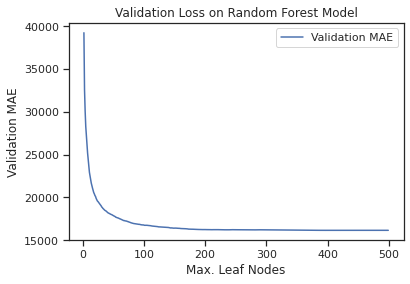

In [195]:
# Now, plots validation errors to visualize

plt.plot(range(2, 500), rf_val_maes[:], "b", label="Validation MAE")
plt.title("Validation Loss on Random Forest Model")
plt.xlabel("Max. Leaf Nodes")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

In [196]:
# It seems from the above plot that MAE is getting lower further beyond a point when value of max. leaf nodes is 
# crossing 200.

rf_val_mae_min = min(rf_val_maes)

print("So, the lowest validation MAE for validation data ", rf_val_mae_min,
     "and the value for max. leaf nodes for which it is the lowest is ", rf_val_maes.index(rf_val_mae_min) + 2)

So, the lowest validation MAE for validation data  16142.136644644985 and the value for max. leaf nodes for which it is the lowest is  423


#### Now, create a Final Model for the competition and submit predictions

Let's build the final model on Random Forest as it predicts better over Decision Tree model. The model will be built on full train data.

In [197]:
rf_model_on_full_data = RandomForestRegressor(max_leaf_nodes=rf_val_maes.index(rf_val_mae_min), random_state=1)

In [198]:
# Trains model on all data
rf_model_on_full_data.fit(X, y)

# Creates a test dataset removing Id column
test_X = test_data.copy().drop(["Id"], axis=1)

# Now, predicts on test data
rf_model_test_data_predictions = rf_model_on_full_data.predict(test_X)

# Creates a data frame out of predictions and save in a physical file to be uploaded into Kaggle competiion site.
prediction_output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': rf_model_test_data_predictions})
prediction_output.to_csv('Predictions.csv', index=False)

# The above output file was uploaded into Kaggle and score (MAE) returned was 15889.33924.

## Rough Work

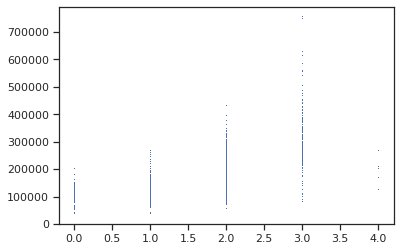

In [107]:
plt.plot(train_data["GarageCars"], train_data.SalePrice, ',')

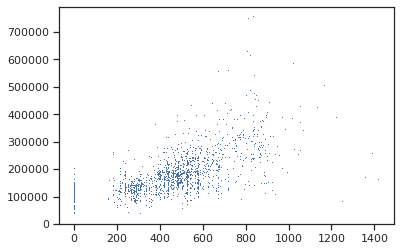

In [133]:
plt.plot(train_data["GarageArea"], train_data.SalePrice, ',')

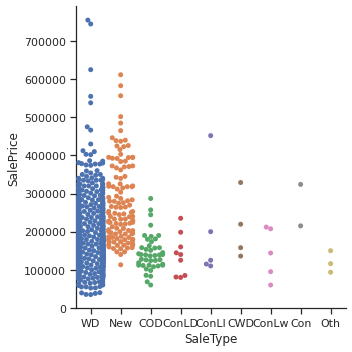

In [148]:
sns.catplot(x="SaleType", y="SalePrice", kind="swarm", data=train_data);

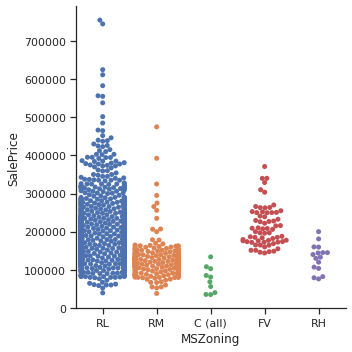

In [63]:
sns.catplot(x="MSZoning", y="SalePrice", kind="swarm", data=train_data);